--- 히스토그램 (9개 변수) ---


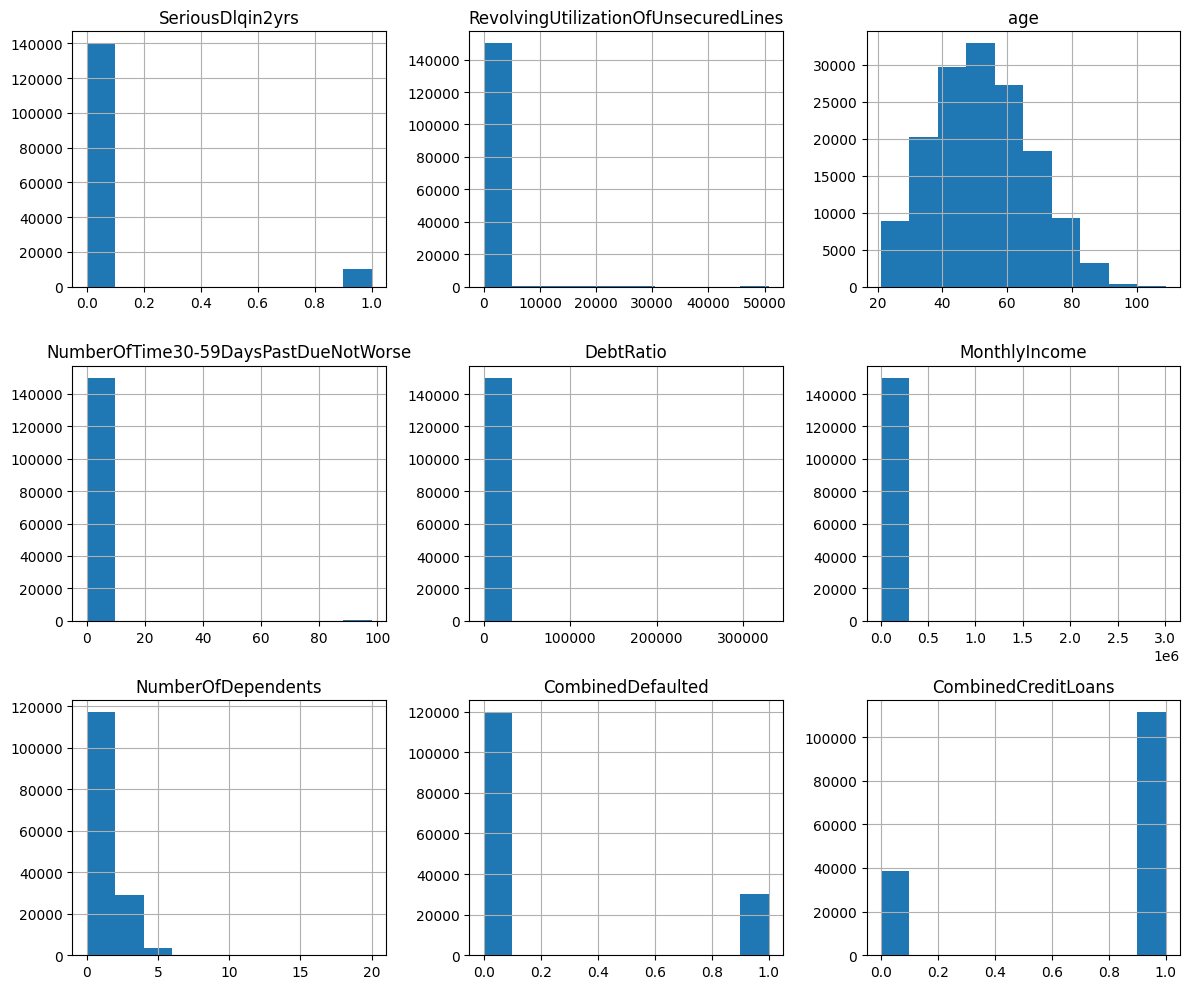

In [ ]:
import pandas as pd
from matplotlib import pyplot

# --- 1. 데이터 로딩 ---
filename = 'givemesomecreidt.csv'

data = pd.read_csv(filename)
# --- 2. 히스토그램 그리기 (Lab 2) ---
# (결측치 처리가 필요 없음)
print("--- 히스토그램 (9개 변수) ---")
data.hist(figsize=(12, 10))
pyplot.tight_layout() # 차트 간 간격 자동 조절
pyplot.show()

--- 박스 플롯 (8개 피처) ---


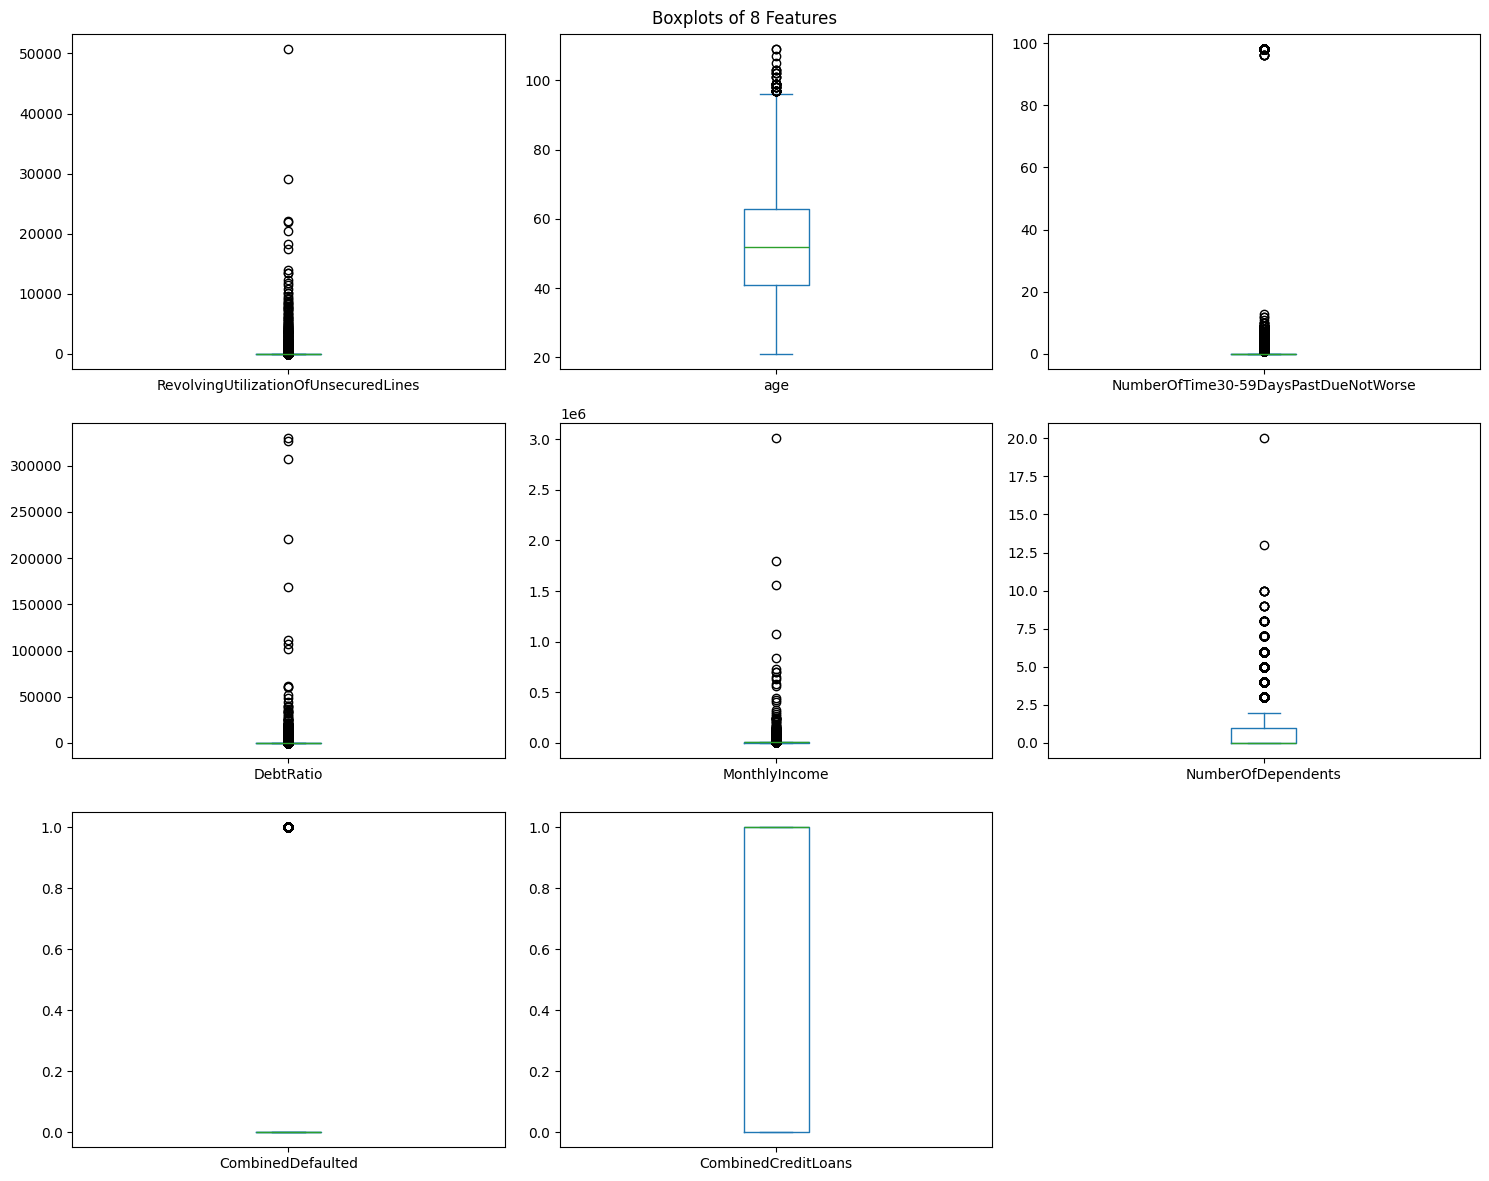

In [ ]:
import pandas as pd
from matplotlib import pyplot
import numpy as np

# --- 1. 데이터 로딩 ---
filename = 'givemesomecreidt.csv'
data = pd.read_csv(filename, on_bad_lines='skip')

# --- 2. 박스 플롯 그리기 (Lab 2) ---
# (결측치 처리가 필요 없음)
print("--- 박스 플롯 (8개 피처) ---")

# 2-1. 타겟 변수('SeriousDlqin2yrs')를 제외한 8개 피처 선택
features_to_plot = data.drop('SeriousDlqin2yrs', axis=1)

# 2-2. 8개 피처에 맞게 레이아웃 설정
num_features = len(features_to_plot.columns) # 8개
layout_cols = 3
layout_rows = int(np.ceil(num_features / layout_cols)) # 8/3 = 3 -> (3, 3)

# 2-3. 박스 플롯 그리기
features_to_plot.plot(kind='box', subplots=True, layout=(layout_rows, layout_cols),
                      sharex=False, sharey=False, figsize=(15, 12),
                      title='Boxplots of 8 Features')
pyplot.tight_layout()
pyplot.show()

--- 히트맵 (9x9 상관관계) Matplotlib 방식 ---


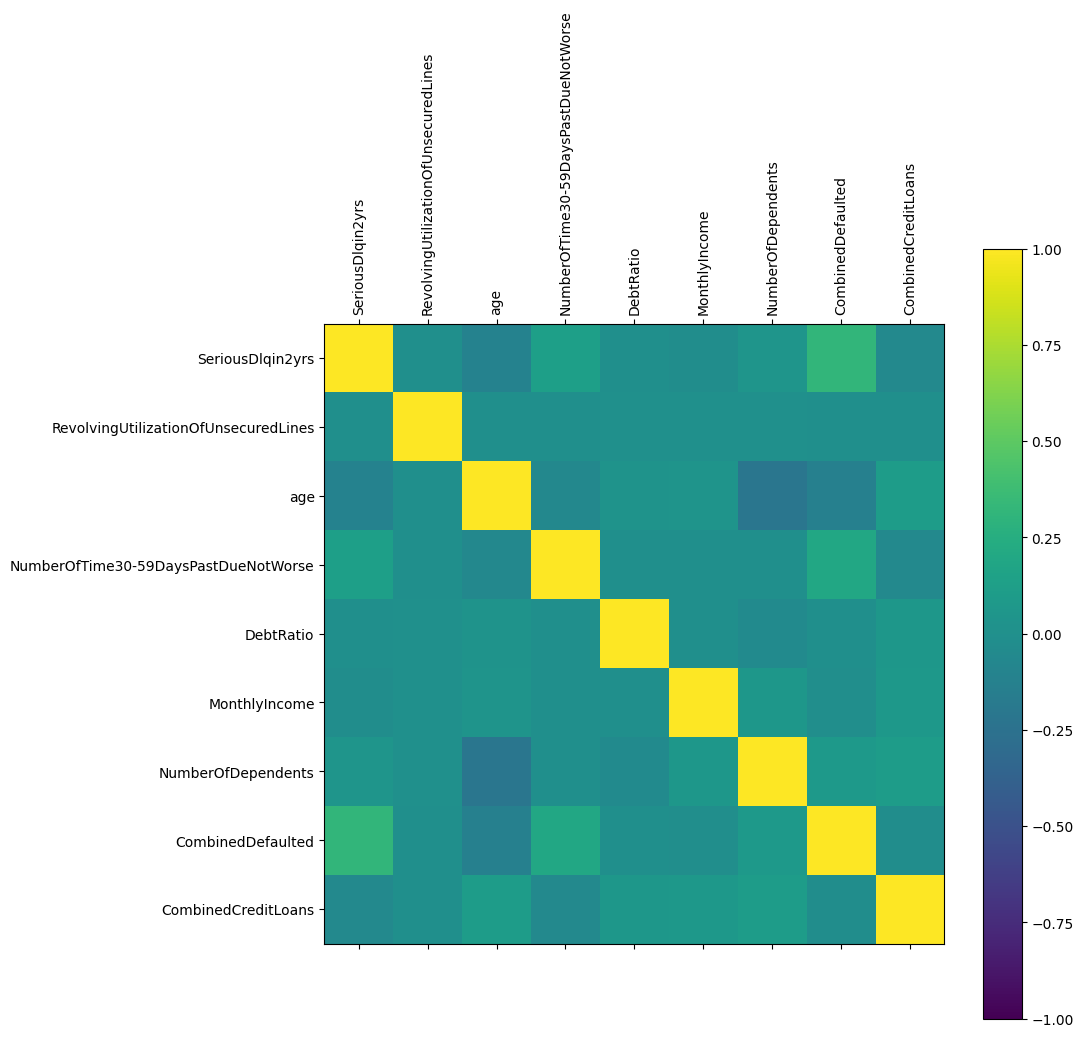

In [ ]:
import pandas as pd
from matplotlib import pyplot
import numpy as np # numpy import 추가

# --- 1. 데이터 로딩 ---
filename = 'givemesomecreidt.csv'
# 💡 78281번 줄의 오류를 '무시(skip)'하는 옵션 추가
data = pd.read_csv(filename)

print("--- 히트맵 (9x9 상관관계) Matplotlib 방식 ---")

# --- 2. Matplotlib 히트맵 그리기 (Lab 2 PDF 방식) ---

# 2-1. 컬럼 이름 리스트 생성 (9개)
names = data.columns.tolist()
# 2-2. 상관관계 계산
correlations = data.corr()
# 2-3. 피처 개수 (9개)
num_features = len(names)

# 2-4. 히트맵 그리기
fig = pyplot.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1) #
fig.colorbar(cax)

# 2-5. 축 설정 (💡 11개 -> 9개로 수정)
ticks = np.arange(0, num_features, 1) # 0부터 8까지 (총 9개)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=90) # 이름이 기므로 90도 회전
ax.set_yticklabels(names)

pyplot.show() # <-- (괄호 추가)

--- 클래스 분포 (수치) ---
SeriousDlqin2yrs
0    116810
1      8303
dtype: int64

--- 클래스 분포 (시각화) ---


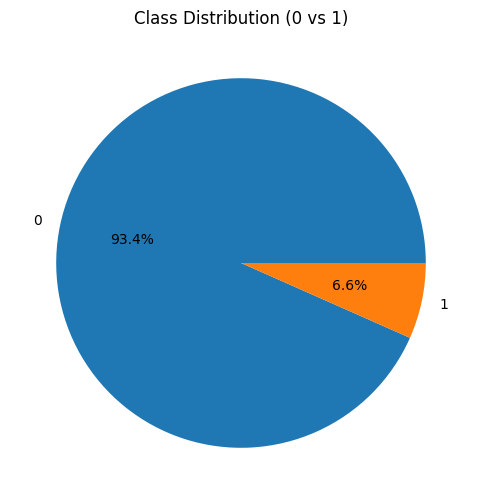

In [ ]:
import pandas as pd
from matplotlib import pyplot

# --- 클래스 분포 (파이 차트) ---

# 1. 수치 확인
class_counts = data.groupby('SeriousDlqin2yrs').size()
print("--- 클래스 분포 (수치) ---")
print(class_counts)

# 2. 파이 차트 시각화
print("\n--- 클래스 분포 (시각화) ---")
pyplot.figure(figsize=(6, 6)) # 차트 크기 (정사각형)
class_counts.plot(kind='pie',            # 차트 종류
                  autopct='%1.1f%%',   # 퍼센트 표시
                  title='Class Distribution (0 vs 1)') # 제목
pyplot.ylabel('') # 불필요한 레이블 제거
pyplot.show()